In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Cargar el dataset

In [3]:

file_path = 'C:/Users/xSPIt/OneDrive/Escritorio/fastapi01/fastapi-env/movies_dataset_modificado.csv'
df = pd.read_csv(file_path)


## 1. Chequeo de valores nulos

In [4]:

print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
belongs_to_collection    663
budget                     0
genres                     0
id                         0
original_language          0
overview                   0
popularity                 0
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                   23
title                      0
vote_average               0
vote_count                 0
dtype: int64


## 2. Chequeo de valores duplicados

In [5]:

duplicados = df.duplicated().sum()
print(f"\nCantidad de filas duplicadas: {duplicados}")



Cantidad de filas duplicadas: 0


## 3. Análisis de tipos de datos

In [6]:

print("\nTipos de datos:")
print(df.dtypes)



Tipos de datos:
belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
vote_count               float64
dtype: object


## 4. Análisis estadístico de los datos numéricos

In [7]:

print("\nResumen estadístico:")
print(df.describe())



Resumen estadístico:
             budget             id   popularity       revenue      runtime  \
count  1.121000e+03    1121.000000  1121.000000  1.121000e+03  1121.000000   
mean   6.947747e+07   74493.227475    18.616197  2.762571e+08   115.854594   
std    6.091157e+07  103569.733080    27.265791  2.749245e+08    21.064724   
min    0.000000e+00      11.000000     0.393865  0.000000e+00    64.000000   
25%    2.000000e+07    1586.000000    11.038970  9.618890e+07   101.000000   
50%    5.000000e+07   13804.000000    13.941480  1.941687e+08   113.000000   
75%    1.000000e+08  109421.000000    18.146043  3.626375e+08   127.000000   
max    3.800000e+08  419430.000000   547.488298  2.787965e+09   229.000000   

       vote_average    vote_count  
count   1121.000000   1121.000000  
mean       6.768956   2530.474576  
std        0.749357   1789.717152  
min        4.100000   1000.000000  
25%        6.200000   1340.000000  
50%        6.700000   1852.000000  
75%        7.300000   3

## 5. Detección de valores faltantes

In [8]:

print("\nPorcentaje de valores faltantes por columna:")
print(df.isnull().mean() * 100)



Porcentaje de valores faltantes por columna:
belongs_to_collection    59.143622
budget                    0.000000
genres                    0.000000
id                        0.000000
original_language         0.000000
overview                  0.000000
popularity                0.000000
production_companies      0.000000
production_countries      0.000000
release_date              0.000000
revenue                   0.000000
runtime                   0.000000
spoken_languages          0.000000
status                    0.000000
tagline                   2.051740
title                     0.000000
vote_average              0.000000
vote_count                0.000000
dtype: float64


## 6. Gráficos de outliers usando boxplots

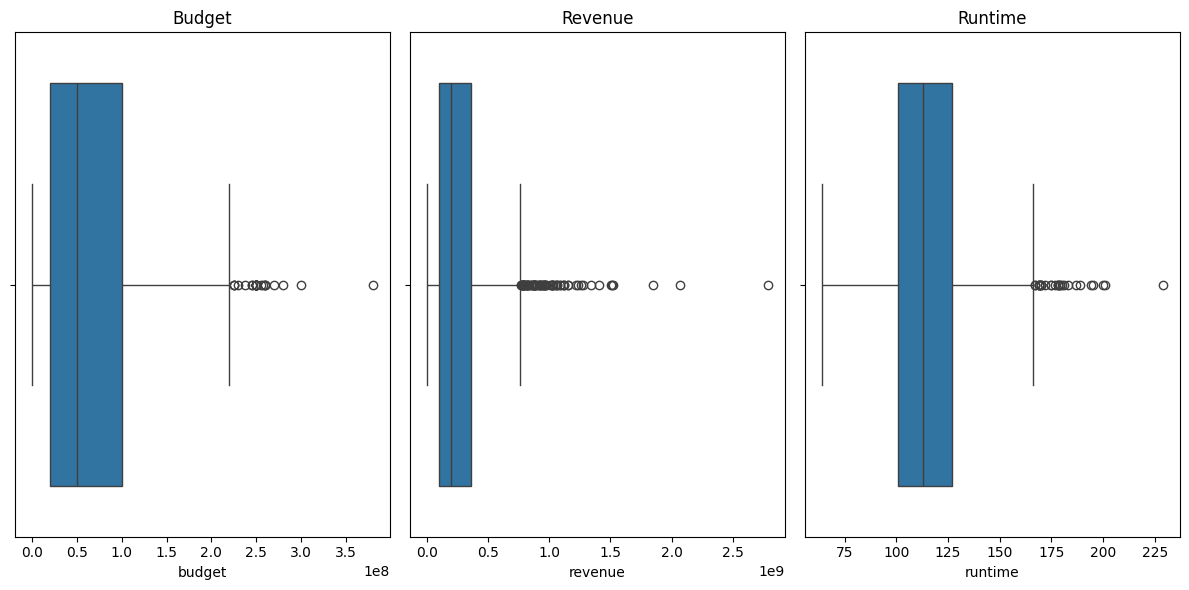

In [9]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, x='budget')
plt.title('Budget')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='revenue')
plt.title('Revenue')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='runtime')
plt.title('Runtime')

plt.tight_layout()
plt.show()


## 7. Análisis de correlación (correlación bivariada)

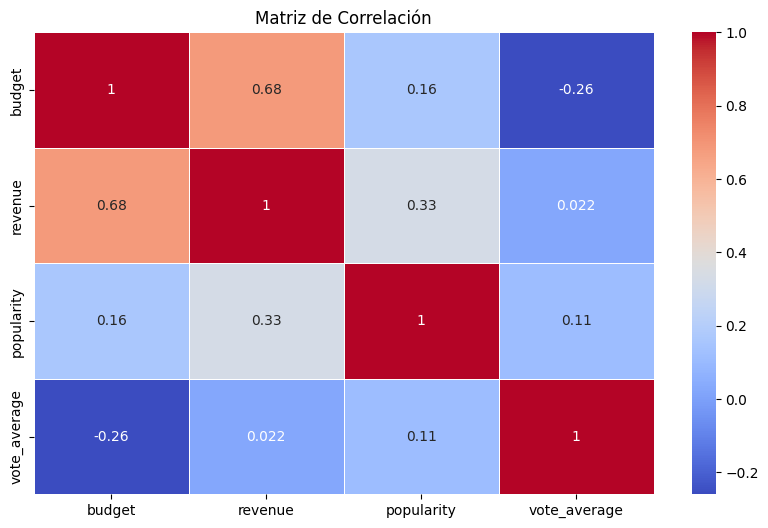

In [10]:

correlation_matrix = df[['budget', 'revenue', 'popularity', 'vote_average']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


## 8. Análisis multivariado con pairplot

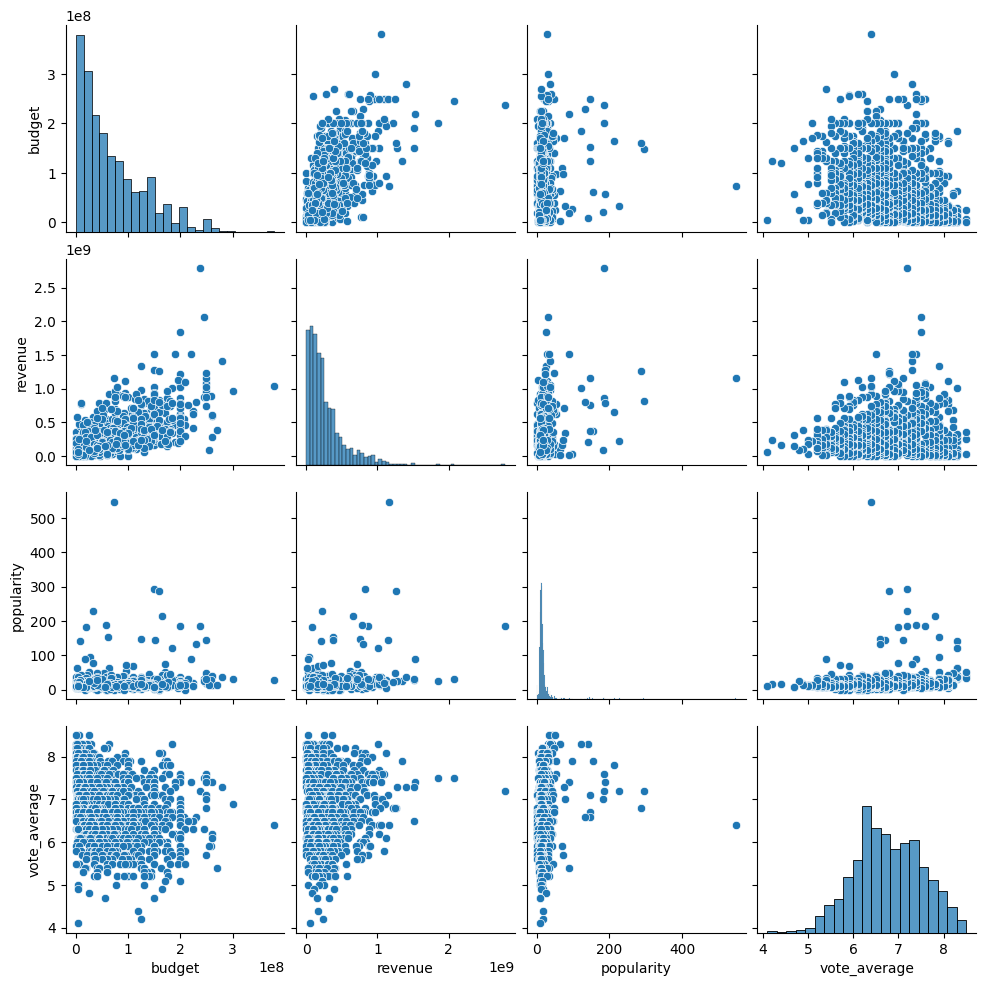

In [11]:

sns.pairplot(df[['budget', 'revenue', 'popularity', 'vote_average']])
plt.show()


## 9. Creación de una nube de palabras para los títulos

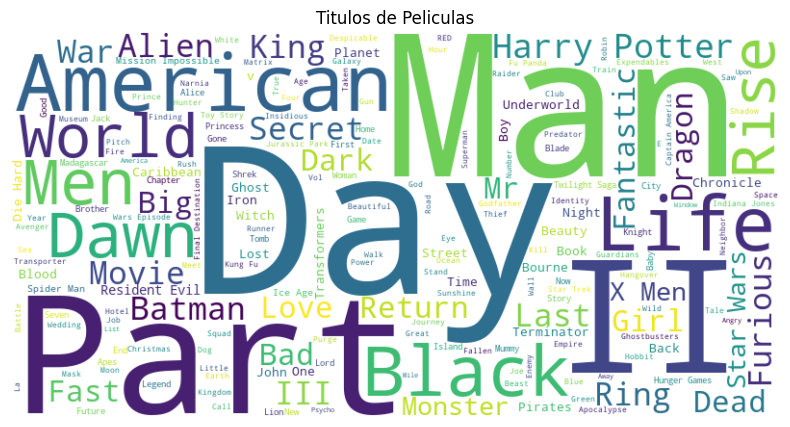

In [12]:

titles = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Titulos de Peliculas')
plt.show()
